In [1]:
import jax.random as jr
import jax
import matplotlib.pyplot as plt

from  src.sdes import sde_time_dependent, sde_utils, sde_data

In [2]:
x0 = (3.,)
y = (0.,)
num_trajectories = 20

key =  jr.PRNGKey(1)
traj_keys = jax.random.split(key, num_trajectories)

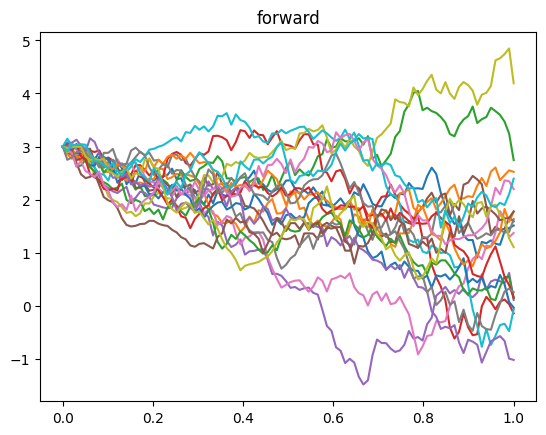

In [3]:
T = 1.
N = 100
time_dependent_sde = sde_time_dependent.simple_time_dependent(T, N, 1)

trajectory_gen = sde_data.data_forward(x0, time_dependent_sde)
_ts, trajectories, _corr = trajectory_gen(traj_keys)

for traj in trajectories:
    plt.plot(time_dependent_sde.time_grid, traj)
plt.title("forward")
plt.show()

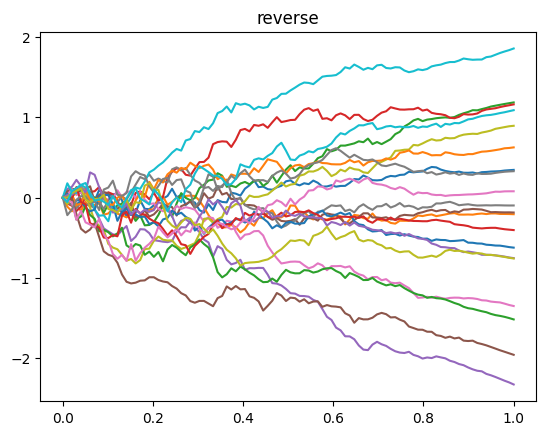

In [4]:
trajectory_gen = sde_data.data_adjoint(y, time_dependent_sde)
_ts, trajectories, _corr = trajectory_gen(traj_keys)

for traj in trajectories:
    plt.plot(time_dependent_sde.time_grid, traj)
plt.title("reverse")
plt.show()